# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [84]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from scipy.spatial import distance
import random

In [179]:
#Extraction of customer data from csv file
data = pd.read_csv('Customer data.csv')

data.shape
import random
data.head(2)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2


In [48]:
numpy_array = data.to_numpy()

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [63]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
## write code here for the Distance function here # 
#Distance time is ecluidian or pearson correlation
#cluster_centroids is array(having all centroids) of arrays(having on centroid with all features)
#data_points is array(having all data points) of arrays(having a point with all features)
    NumberOfClusters=len(Cluster_Centroids)
    NumberOfDatapoints=len(Data_points)
    #DataFrame with rows equal to data points columns equal K 
    df = pd.DataFrame(index=range(NumberOfDatapoints),columns=range(NumberOfClusters))
    if Distance_Type=="Ecludian":
        i=0
        #loop on every clustercentroid 
        while i<NumberOfClusters:
            k=0
            IthCentroid=Cluster_Centroids[i]
            #loop on all data points with every clustercentroid separately  
            while k<NumberOfDatapoints:
                kthDatapoint=Data_points[k]
                #Distance between the I+1 centroid and the k+1 datapoint  
                distancee=distance.euclidean(IthCentroid, kthDatapoint)
                df.loc[k][i]=distancee
                k=k+1
            i=i+1
        
        
    else:
        i=3
      
    Cluster_Distance= df
    return Cluster_Distance 



In [198]:
#s=GUC_Distance ([[1,0,2,0,0,5,0,0],[6,7,3,0,0,6,0,0]], numpy_array, "Ecludian" )
s=GUC_Distance ([[0,0],[5,5]],[[0,0],[1,2],[5,5]], "Ecludian" )
print(s)
MinValueOfEveryRow = s.min(axis = 1)
MinValueOfEveryRow 
k=pd.DataFrame(s)
s=[[1,2],[2,3]]
n=s[0].index(max(s[0]))
k.head()
n
print(s)
nu = np.array(s)
max(nu[0])
#print(nu[0].index(max(nu[0])))
#print(nu[0].index(max(nu[0])))

         0        1
0        0  7.07107
1  2.23607        5
2  7.07107        0
[[1, 2], [2, 3]]


2

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [12]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
       # write code for intial cluster heads here
    #according to number of clusters we need random data points to be initial data points
    Dataframetorandomize=pd.DataFrame(Data_points)
    NumberOfFeatures=len(Data_points[0])
    PreviousCentroids=[]
    Centr=[]
    MaxValues=Dataframetorandomize.max() #every feature and corresponding max value
    MinValues=Dataframetorandomize.min() #every feature and corresponding min values
    k=0
    #loop for appending needed number centroids
    while k<Number_of_Clusters:
        i=0
        #loop for finding random numbers to be assigned to centroids
        while i<NumberOfFeatures:
            Maximum=MaxValues[i]
            Minimum=MinValues[i]
            randomlist = random.randrange(Minimum, Maximum)
            centr.append(randomlist)
            i=i+1
        PreviousCentroids.append(centr)
        k=k+1
   
       
       # write your your loop 
    s=GUC_Distance ( PreviousCentroids, Data_points, Distance_Type ) #s is matrix having distances between points and each centroid
    MinValueOfEveryRow = s.min(axis = 1)
    n=0
    while n<len(s):
        minvalue=min(s[n])
        f=s[n].index(min(s[n]))
        n=n+1
    
    
    
    return [ Final_Cluster_Distance , Cluster_Metric ]    

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [3]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [4]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

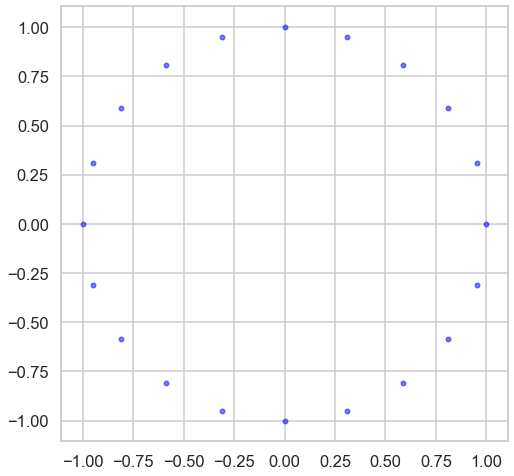

In [5]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

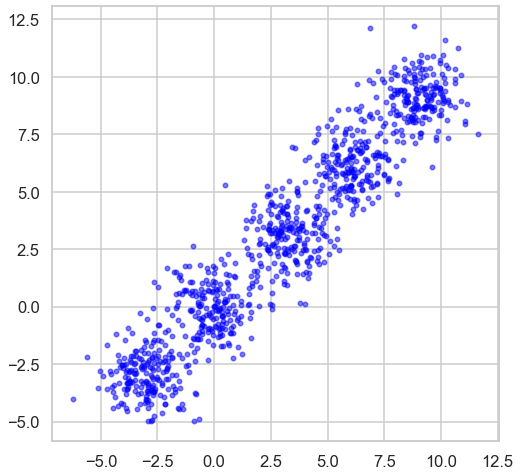

In [6]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

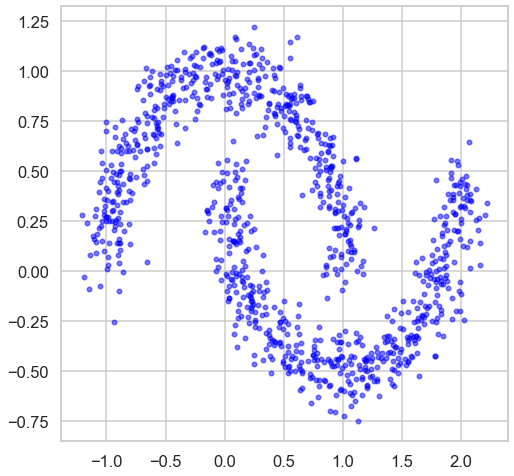

In [18]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 